In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('DataScienceAssessment (1).csv')
data.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         9195 non-null   object
 1   CustomerGender  9195 non-null   object
 2   Location        9195 non-null   object
 3   Region          9195 non-null   object
 4   TotalPrice      9195 non-null   int64 
 5   StartDate       9195 non-null   object
 6   Deposit         9195 non-null   int64 
 7   DailyRate       9195 non-null   int64 
 8   TotalDays       9195 non-null   int64 
 9   AmountPaid30    9195 non-null   int64 
 10  AmountPaid60    9195 non-null   int64 
 11  AmountPaid360   9195 non-null   int64 
 12  LoanStatus360   9195 non-null   object
dtypes: int64(7), object(6)
memory usage: 934.0+ KB


In [4]:
data.shape

(9195, 13)

### Exploratory Data Analysis

In [5]:
# Split data based on data types
cat_data = data.select_dtypes(include = 'object')
num_data = data.select_dtypes(include = 'number')

In [89]:
print(cat_data.shape)
print(num_data.shape)

(9195, 6)
(9195, 7)


#### Exploring categorical features

In [6]:
cat_data.columns

Index(['Product', 'CustomerGender', 'Location', 'Region', 'StartDate',
       'LoanStatus360'],
      dtype='object')

['Active' 'Blocked' 'Finished Payment']

Active              6742
Finished Payment    1604
Blocked              849
Name: LoanStatus360, dtype: int64


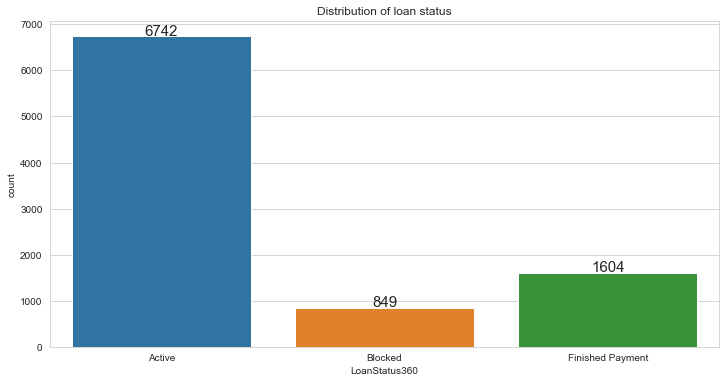

In [7]:
# Check Loan Status count to know how balanced the dataset is
print(data['LoanStatus360'].unique())
print('')
print(data['LoanStatus360'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

plt.title('Distribution of loan status')
plots = sns.countplot(data['LoanStatus360'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

['Product B' 'Product C' 'Product D' 'Product A' 'Product E' 'Product F']

Product B    3862
Product A    3141
Product C     999
Product D     975
Product E     213
Product F       5
Name: Product, dtype: int64


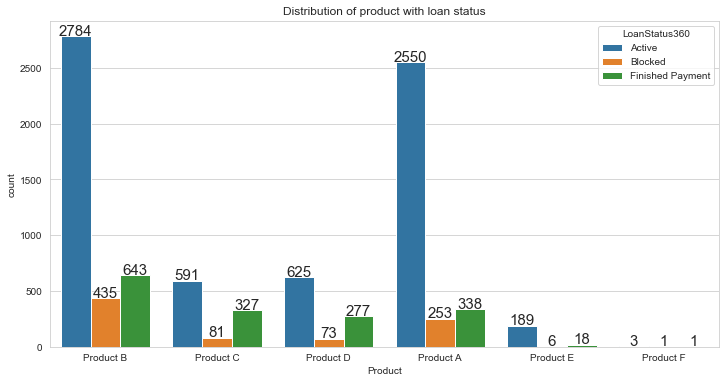

In [8]:
# Plot showing product distribution and loan status count
print(data['Product'].unique())
print('')
print(data['Product'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

plt.title('Distribution of product with loan status')
plots = sns.countplot(data['Product'], hue=data['LoanStatus360'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

['Male' 'Female' 'NotSpecified']

Male            5358
Female          3290
NotSpecified     547
Name: CustomerGender, dtype: int64


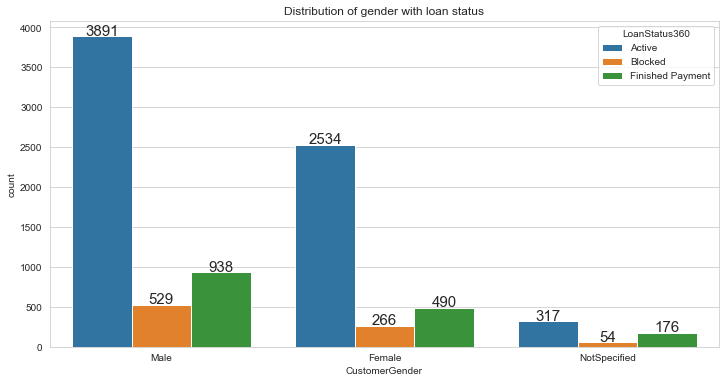

In [9]:
# Plot showing gender distibution and loan status
print(data['CustomerGender'].unique())
print('')
print(data['CustomerGender'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

plt.title('Distribution of gender with loan status')
plots = sns.countplot(data['CustomerGender'], hue=data['LoanStatus360'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

In [10]:
# Number of unique location
data['Location'].nunique()

791

In [11]:
# Number of unique region within the dataset
data['Region'].value_counts().sort_values(ascending=False)[:7]

Region 6    2934
Region 3    1941
Region 2    1364
Region 1    1232
Region 7     622
Region 4     588
Region 5     198
Name: Region, dtype: int64

In [12]:
print(data['Region'].unique())
print('')
print(data['Region'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# plt.title('Distribution of Region with loan status')
# plots = sns.countplot(data['Region'], hue=data['LoanStatus360'])

# for bar in plots.patches:
#     plots.annotate(format(bar.get_height(), '.0f'),  
#                        (bar.get_x() + bar.get_width() / 2,  
#                         bar.get_height()), ha='center', va='center', 
#                        size=15, xytext=(0, 5), 
#                        textcoords='offset points')

['Region 2' 'Region 3' 'Region 5' 'Region 1' 'Region 6' 'Region 4'
 'Region 7' 'Region 10' 'Region 11' 'Region 9' 'Region 12' 'Region 8'
 'Region 13' 'Region 14' 'Region 15' 'Region 16' 'Region 17' 'Region 18']

Region 6     2934
Region 3     1941
Region 2     1364
Region 1     1232
Region 7      622
Region 4      588
Region 5      198
Region 13      62
Region 8       44
Region 12      39
Region 10      38
Region 9       33
Region 14      25
Region 15      22
Region 18      16
Region 17      14
Region 11      12
Region 16      11
Name: Region, dtype: int64


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

#### Exploring numerical features

In [13]:
num_data.head()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
0,16600,2000,40,365,3121,4241,13621
1,16600,2000,40,365,3061,4171,15041
2,15600,1000,40,365,2160,3280,15340
3,16600,2000,40,365,3041,4241,15321
4,20250,2000,50,365,3470,4820,13720


In [14]:
# Descriptive statistic about the data
num_data.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
count,9195.000000,9195.000000,9195.000000,9195.0,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,365.0,3580.482762,4735.672974,14673.833061
std,6053.291677,1412.612091,13.375759,0.0,2487.320211,2756.332798,6676.242654
min,13775.000000,1000.000000,35.000000,365.0,-3200.000000,-3200.000000,-3200.000000
25%,16600.000000,2000.000000,40.000000,365.0,2500.000000,3437.500000,11351.000000
50%,16600.000000,2000.000000,40.000000,365.0,3351.000000,4400.000000,15140.000000
75%,20250.000000,2000.000000,50.000000,365.0,4601.000000,5668.000000,16600.000000
max,69225.000000,9000.000000,165.000000,365.0,26001.000000,33501.000000,69225.000000


<AxesSubplot:title={'center':'Amount Paid 360 vs Total PRice'}, xlabel='TotalPrice', ylabel='AmountPaid360'>

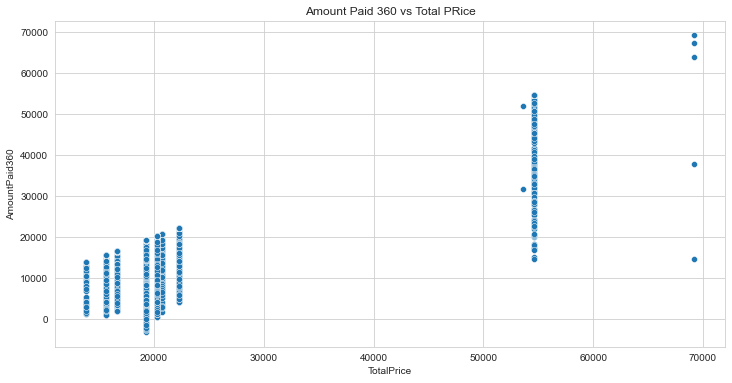

In [91]:
# Total Amount to be paid vs Total amount paid distribution
plt.figure(figsize=(12,6))

plt.title('Amount Paid 360 vs Total PRice')
sns.scatterplot(data['TotalPrice'], data['AmountPaid360'])

<AxesSubplot:xlabel='Deposit', ylabel='AmountPaid360'>

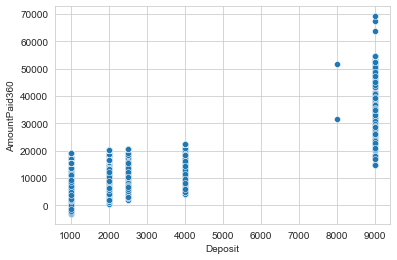

In [16]:
sns.scatterplot(data['Deposit'], data['AmountPaid360'])

<AxesSubplot:xlabel='DailyRate', ylabel='AmountPaid360'>

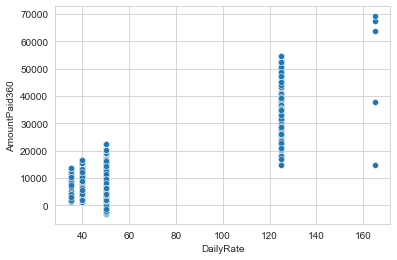

In [17]:
sns.scatterplot(data['DailyRate'], data['AmountPaid360'])

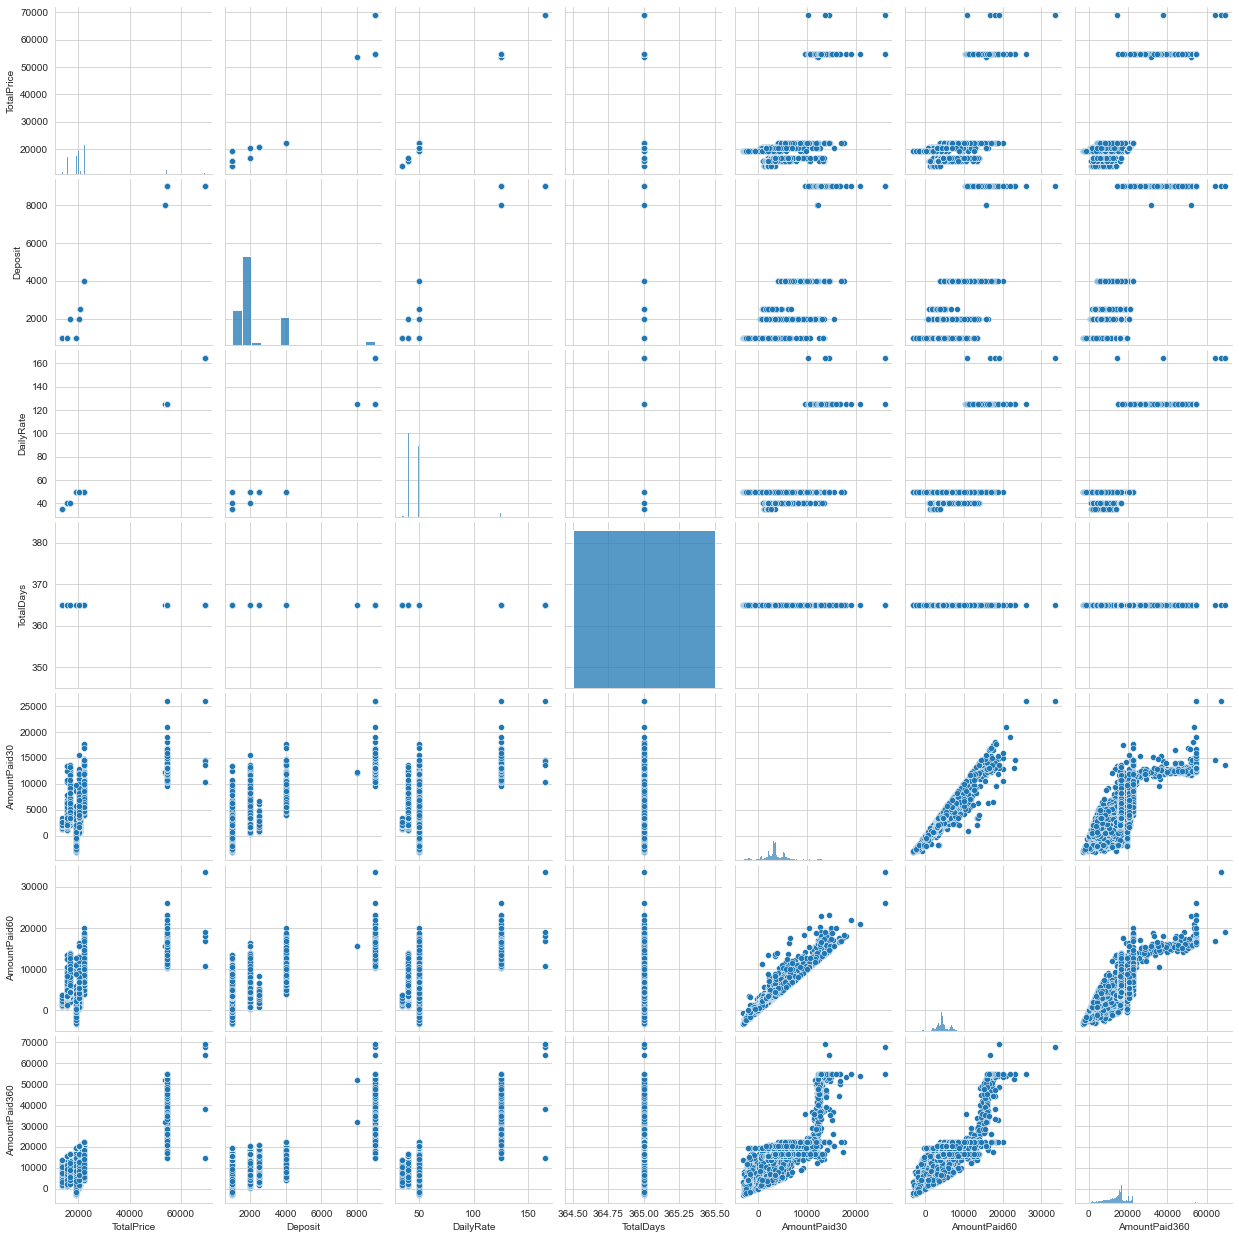

In [18]:
# Check out multivariate correlation between numerical features
sns.pairplot(num_data)

### Encode Target Variable

In [19]:
# Target Variable encoded as -1 for blocked account, 0 for active and 1 for fully paid as this is an ordinal categorical 
# feature where the encoded values are relevant in the analysis

In [20]:
# encode target variable loan status
def encode_target(df, target):
    loan_status = {'Blocked': -1, 'Active': 0, 'Finished Payment': 1}
    df[target]= df[target].map(loan_status)

In [21]:
encode_target(data,'LoanStatus360')

In [22]:
data['LoanStatus360'].value_counts()

 0    6742
 1    1604
-1     849
Name: LoanStatus360, dtype: int64

### Data Splitting

Start date will be dropped during splitting as there is a total days features which shows the number of days from start date to the current loan status date. 

Location would be dropped as well, as region and location holds similar meaning and it would only make sense to use one of the two.

In [23]:
from sklearn.model_selection import train_test_split

# split data into 80% training dataset and 20% testing dataset
X = data.drop(['LoanStatus360','StartDate','Location'], axis = 1)
y = data['LoanStatus360']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42, stratify=y)

In [92]:
from collections import Counter
Counter(y_train)

Counter({0: 5394, -1: 679, 1: 1283})

## Data Preprocessing

### Feature Selection

Feature selection is a vital approach in data science because of variety of reasons, some of which will be listed here.

1. It helps prevent over-fitting and improves model performance.
2. To provide provide faster models and also manage computation.
3. Better insight insight is gained as to how each feature contribute to the entire dataset

In [24]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [25]:
X_train_cat.columns

Index(['Product', 'CustomerGender', 'Region'], dtype='object')

#### categorical feature selection

The Chi-Squared test is used to determine the extent of relationship or dependence between two categorical variables — in this case, one categorical input feature, and the other, a categorical target variable. So we will iterativly run through the categorical features perfroming the test.

In case of unencoded categorical features like we will be using here, a contingency table created with **pd.crosstab** will help relating number of occurence of each category with the target variable after which Chi-squared test will then be carried out.

A p-value will be returned along side other statiscal variables like degree of freedom etc. Since we care if the feature is relevant to predicting our target or not, a value lesser than **0.05** will assert that we reject the null hypothesis stating the feature is not relevant for predicting the target variable, in our case LoanStatus360

In [26]:
# import necessary library

# For object type categorical features that have not been numerically encoded we use chi2_contingency
from scipy.stats import chi2_contingency

In [27]:
# define an empty dictionary to store chi-test results
chi2_check = {}

# loop over each column in the encoded training set to calculate chi statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Categorical_Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))
    
# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result

,Feature,p-value
0,Product,0.0
1,CustomerGender,0.0
2,Region,0.0


In [28]:
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)

# select the top 4 features based on lowest p values
top4_chi2 = chi2_result.nsmallest(4, 'p-value')['Feature'].tolist()
top4_chi2

['Product', 'CustomerGender', 'Region']

#### Numerical feature selection

The Analysis of Variance (ANOVA) F-statistic calculates the ratio of variances of the means of two or more samples of data. The higher this ratio between a numerical input feature and a categorical target feature, the lower the independence between the two and more likely to be useful for model training.

Just as explained when using chi2 test for categorical feature selection. The f_classif returns some statistical variables along side a p-value for each feature. We select features with p-values lesser than 0.05 which inferes that the faeture is statiscally significant for the purpose of our prediction with respect to the target variable.

In [29]:
# import the required library
from sklearn.feature_selection import f_classif

In [30]:
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)

# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {
    'Numerical_Feature': X_train_num.columns.values,
    'F-Score': F_statistic, 
    'p-values': p_values.round(decimals=5)
})

In [31]:
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p-values
0,AmountPaid360,1038.254302,0.0
1,AmountPaid60,201.848569,0.0
2,AmountPaid30,144.106762,0.0
3,DailyRate,25.054755,0.0
4,TotalPrice,23.793842,0.0
5,Deposit,13.754006,0.0
6,TotalDays,NaN,NaN


In [32]:
# save the top 5 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:6,0].to_list()
top_num_features

['AmountPaid360',
 'AmountPaid60',
 'AmountPaid30',
 'DailyRate',
 'TotalPrice',
 'Deposit']

### Check variable correlation

Another vital method in feature selection is checking how much each numerical variable correlates with one another using spearman's correlation technique.

Correlating variables tend to provide similar information about the dataset. Having higly correlated variable will prevent accurate prediction of the target variable as correlating features will predict each other more often than our variable of interst (LoanStatus360).

To Prevent this from happening and also to have an optimized model, we check for correlation and drop one of the features having correlation greater than a specified threshold.

<AxesSubplot:>

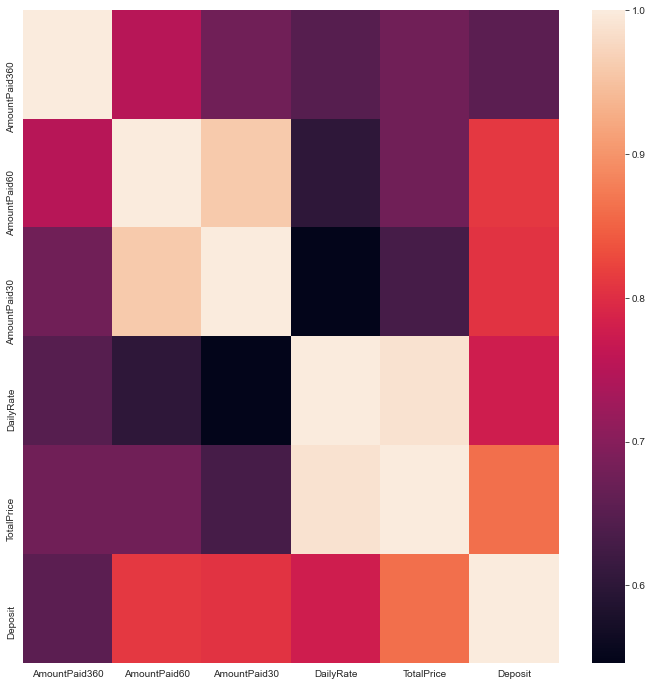

In [33]:
# calculate pair-wise correlations between the numerical features 

corrmat = X_train_num[top_num_features].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corrmat)

In [34]:
# Check for correlation in the training dataset

def get_correlated(data, threshold):
    cols = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if corrmat.iloc[i,j] > threshold:
                colname = corrmat.columns[i]
                cols.add(colname)
    return cols

In [35]:
# dropping features having correlation greater than 0.9
correlated_data = get_correlated(X_train_num[top_num_features], 0.9)
correlated_data 

{'AmountPaid30', 'TotalPrice'}

In [36]:
# save the names of columns to be dropped in a list
# Since all the categorical columns are relevant to our analysis, we drop irrelevant column from the numerical features and 
# also the correlating features 

drop_columns_list = ANOVA_F_table.iloc[6:, 0].to_list()
drop_columns_list.extend(correlated_data)
drop_columns_list

['TotalDays', 'AmountPaid30', 'TotalPrice']

In [37]:
# function to drop these columns
def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)

In [38]:
X_train.shape

(7356, 7)

### Encode Selected Categorical Features

Because scikit learn algorithms won't accept strings, we have to encode our categorical features. Since these features are nominal, we will apply an encoding that does not add rank to unique element of these features, thus we will have 0s and 1s for when an observation is absent or present respectively. For this purpose, pandas get dummies will be used. To prevent the dummy variable trap, one of the encoded feature will be dropped. 

In [39]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, drop_first=True, prefix_sep = '-'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    df.drop(columns_list, axis=1,inplace = True)
    return df

In [40]:
# create dummy variables for unencoded categorical features
X_train = dummy_creation(X_train,['Product', 'CustomerGender', 'Region'])

In [41]:
X_train.shape

(7356, 28)

### Apply above preprocessing steps to the test dataset

In [42]:
# Drop irrelevant features 
col_to_drop(X_test, drop_columns_list)

# Create dummy variables for categorical features
X_test = dummy_creation(X_test, ['Product', 'CustomerGender', 'Region'])

In [43]:
X_test.shape

(1839, 28)

### Balance the training dataset 

A balanced dataset is vital when building predictive models. Imbalanced dataset will result in a model predicting the majority class most of the time. The result of this being that it understands the trend of the majority class better than the minority class(es).

There are different methods of balancing our dataset in other to get the best of our model. The most common methods include:
1. Undersampling
2. Oversampling
3. Synthetic minority over-sampling technique (SMOTE)

Undersampling simply reduces the observation in the majority class(es) balancing it with class with the least observation. Undersampling is not very efficient as information will be lost when obsevations are being dropped from the majority class(es). Oversampling does the opposite but with a little difference when considering SMOTE.

For this task, we will be using SMOTE as it has proven to be the best method of generating samples to balance up the minority class(es).  SMOTE simply synthesizes elements of the minority class using the existing ones. It randomly chooses a point from the minority class and computes the k-nearest neighbors (default = 5) for this point. The synthetic points are added between the chosen point and its neighbors by choosing a factor between 0 and 1 to multiply the distance.

In [44]:
# import the SMOTE library from imblearn for the purpose of balancing the dataset
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [46]:
# Check to see if the dataset is balanced 
from collections import Counter
Counter(y_smote)

Counter({0: 5394, -1: 5394, 1: 5394})

### Modelling

#### Scaling and Normalization

Scaling and Normalization is an essential part of every ML process. The reason for this is to prevent bias in our model training process. Scikit learn algorithms tend to attach more importance to features with large numerical figures making the model bias towards features with large numerics. To prevent this and ensure our algorithm sees and train without bias, we scale the dataset. 
There are differnt methods of scaling our dataset, StandardScaler, MinMax scaler etc. 

In [47]:
# create a function to perform feature scaling because some algorithms need this prior to fitting.
from sklearn.preprocessing import StandardScaler

In [48]:
def feature_scaling(X, X_test=X_test):
    std_scale = StandardScaler().fit(X)
    X_std = std_scale.transform(X)
    X_test_std = std_scale.transform(X_test)
    return X_std, X_test_std

In [49]:
X_smote_std, X_test_std = feature_scaling(X_smote, X_test)

#### Cross Validation for algorithm selection

Cross-validation is a technique majorly used for preventing overfitting. However, it has been used over time in algorithm selection. Cross-validation works by splitting the entire dataset into K number of folds as specified. 

For every iteration given a K value, the dataset is splitted into training dataset and validation dataset based on the K value at that iteration. The advantage of using cross-validation during training and algortihm selection is that it uses the entire dataset in the process, there by validating on a specified split and train on the rest of the dataset. 

Running cross-validation of different algorithm returns a mean accuracy score which shows which algorithm fits well with the data.

A further step can be to do hyper-parameter tuning on the algorithms with the best mean accuracy to better optimize them for modelling.

**PS: Overfitting occurs when a trained algorithm (the model) fails to generalize on unseen data.**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import cross_val_score,RandomizedSearchCV

In [51]:
# A function that performs cross-validation on algorithms and return its mean accuracy
def select_algo(algo,X,y):
    cv_scores=cross_val_score(algo, X, y, cv=15, scoring='accuracy')
    return cv_scores.mean()

In [52]:
classifiers = []

classifiers.append(('Logistic Regression', LogisticRegression()))
classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))
classifiers.append(('Random Forest', RandomForestClassifier()))

In [53]:
classifiers

[('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB()),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier())]

In [54]:
best_algo = {}

for classifier in classifiers:
    cv_score = select_algo(classifier[1], X_smote_std, y_smote)
    best_algo.setdefault('Classifier',[]).append(classifier[0])
    best_algo.setdefault('cv_score',[]).append(cv_score)

In [55]:
pd.DataFrame(best_algo)

,Classifier,cv_score
0,Logistic Regression,0.924549
1,Naive Bayes,0.357805
2,KNN,0.921646
3,Decision Tree,0.952233
4,Random Forest,0.961564


Now that it is established that for our task Random Forest is the best algorithm to work with. We will perform hyper-parameter tuning to get the best out of it.

### Hyper Parameter Tuning 

The Major purpose of tuning parameters of an algorithm is to optimally get the best performance of the algorithm. We select few parameters to tune leaving the rest as default and then run iterations which is the number of times the training will occur randomly picking the parameters against themselves.

Tuning parameter can be done using GridSearch or RandomizedSearch. RandomizedSearch is used here due to the fact that GridSearch can be computationally expensive. 

While they give approximately the same result. GridSearch does more but takes time to fit the data.

In [57]:
rfc = RandomForestClassifier()

param_dist = dict(
    n_estimators = [100,200,300,400,500], 
    criterion=["gini", "entropy"],
    random_state=[5,10,15,20,25],
    class_weight = ["balanced", "balanced_subsample"],
)
k_range = range(2, 16)

k_score = {}

for k in k_range:
    rfc_random = RandomizedSearchCV(rfc, param_dist,cv=k, scoring='accuracy',n_iter=10, n_jobs=-1,verbose=1)
    rfc_random.fit(X_smote_std, y_smote)

    k_score.setdefault('Best Accuracy',[]).append(rfc_random.best_score_)
    k_score.setdefault('Best tuned parameter',[]).append(rfc_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Fitting 7 folds for each of 10 candidates, totalling 70 fits
Fitting 8 folds for each of 10 candidates, totalling 80 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 11 folds for each of 10 candidates, totalling 110 fits
Fitting 12 folds for each of 10 candidates, totalling 120 fits
Fitting 13 folds for each of 10 candidates, totalling 130 fits
Fitting 14 folds for each of 10 candidates, totalling 140 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [58]:
pd.DataFrame(k_score)

,Best Accuracy,Best tuned parameter
0,0.952354,"{'random_state': 15, 'n_estimators': 500, 'cri..."
1,0.956309,"{'random_state': 25, 'n_estimators': 400, 'cri..."
2,0.958783,"{'random_state': 10, 'n_estimators': 400, 'cri..."
3,0.958351,"{'random_state': 20, 'n_estimators': 500, 'cri..."
4,0.959770,"{'random_state': 15, 'n_estimators': 100, 'cri..."
5,0.959463,"{'random_state': 25, 'n_estimators': 100, 'cri..."
6,0.960019,"{'random_state': 15, 'n_estimators': 100, 'cri..."
7,0.961253,"{'random_state': 10, 'n_estimators': 300, 'cri..."
8,0.961877,"{'random_state': 15, 'n_estimators': 400, 'cri..."
9,0.962000,"{'random_state': 15, 'n_estimators': 100, 'cri..."


In [60]:
# The best accuracy obtained after parameter tuning
pd.DataFrame(k_score).iloc[12:13,:]

,Best Accuracy,Best tuned parameter
12,0.962985,"{'random_state': 5, 'n_estimators': 200, 'crit..."


In [61]:
pd.DataFrame(k_score).iloc[12:13,:]['Best tuned parameter']

12    {'random_state': 5, 'n_estimators': 200, 'crit...
Name: Best tuned parameter, dtype: object

In [69]:
# Parameters that return the best accuracy from our tuning process
{'random_state': 5,
   'n_estimators': 200,
   'criterion': 'entropy',
   'class_weight': 'balanced'}

{'random_state': 5,
 'n_estimators': 200,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [70]:
# Knowing what parameters gives us the best performance, 
# we train a random forest classifier with them, setting the rest of the parameters as default

loan_status_rfc = RandomForestClassifier(n_estimators=200,random_state=5,criterion='entropy',class_weight='balanced')
loan_status_rfc.fit(X_smote_std, y_smote)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200, random_state=5)

### Predictions and Evaluation

In [71]:
y_pred = loan_status_rfc.predict(X_test_std)

In [72]:
# EValuation 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [73]:
print(accuracy_score(y_test, y_pred))

0.9238716693855357


In [74]:
print(confusion_matrix(y_test,y_pred))

[[ 115   55    0]
 [  76 1269    3]
 [   0    6  315]]


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.60      0.68      0.64       170
           0       0.95      0.94      0.95      1348
           1       0.99      0.98      0.99       321

    accuracy                           0.92      1839
   macro avg       0.85      0.87      0.86      1839
weighted avg       0.93      0.92      0.93      1839



In [85]:
# A quick preview of actual and predicted values of the model
pd.DataFrame({'y_actual':y_test.values, 'y_pred':y_pred}).head()

,y_actual,y_pred
0,0,0
1,0,0
2,0,0
3,-1,0
4,0,-1


In [86]:
# Recall that 
loan_status = {'Blocked': -1, 'Active': 0, 'Finished Payment': 1}

### Conclusion

From our classification report which is the best metrics to use for a classification task as this, it is seen that the model performs well when predicting samples with finished payment with f1-score of 0.99 compared to when it is predicting a blocked sample instance. The f1-score in this case is 0.64. 

F1-score is the preffered metric used here as it combines precision and recall in its computation and as such provides the best estimate when prediciting class or category of loan status

Given this observations, it can be said that most samples exposed to the algorithm are Active and Finished Payment. For a new sample to fall under the blocked category, the trend and pattern needs to be very clear for a correct prediction to be made, otherwise it would be classified as either Active or Finished Payment.